# №1
Уточним условие. Отрезок, на котором следует искать решение - $[-1; 1]$, число интервалов сетки $N = 128$, $k_0 = 1$, $k_1 = 0.05$, в качестве начального приближения в данном случае удобно брать нулевой вектор. Функция $f(x)$ в правой части задается так:

\begin{equation} 
	f(x) = 100exp(-(10t-5)^2)
\end{equation}
Построить график решения.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [175]:
def f(t):
    return 100*np.exp(-(10*t-5)**2)


def diff_scheme(u, f):
    return ( u[2] - u[1] )*(k0 + k1*(u[1]**2 + u[2]**2)/2) - \
                (u[1] - u[0])*(k0 + k1*( u[1]**2 + u[0]**2 )/2) - h**2 * f


def right_part(x, u):
    
    N = len(u)
        
    F_1 = diff_scheme([0, u[0], u[1]], f(x[0]))
    F_k = [ diff_scheme(u[i-1:i+2], f(x[i])) for i in range(1, N - 1) ]
    F_N = diff_scheme([u[N-2], u[N-1], 0], f(x[N-1]))
    
    F = np.append( F_1, F_k )
    F = np.append( F, F_N)
    
    return F


def jacobian_f(F, x, u, h):
    
    dim = len(u)
    
    J = np.zeros((dim, dim))
    du = np.eye(dim) * h
    
    lines_J = [(right_part(x, u + du[dd]) - \
                 right_part(x, u - du[dd]))/2/h for dd in range(dim)]
    
    J = [ line for line in lines_J]
        
    return np.array(J).transpose()


def Newton_method(x, u):
    
    h = 1e-5    
    plt.figure(figsize = (18, 9))
    
    X = x
    U = np.zeros(len(x))
    
    x = x[1:-1]
    u = u[1:-1]
        
    for i in range(20):
        
        F = right_part(x, u)
        J = jacobian_f(F, x, u, h)
                
        v = LA.solve(J, -F)        
        print(str(i+1)+') Norm v =', LA.norm(v))
        
        u = v + u
                 
        U[1:-1] = u   
        
        plt.plot(X, U, color = np.random.rand(3), label = 'Iteration ' + str(i+1))
                 
        if LA.norm(v) < 1e-12:
            break
            
    plt.xlabel('x', fontsize = 20)
    plt.ylabel('u(x)', fontsize = 20)
    plt.grid()    
    plt.legend(loc = 'best', fontsize = 16)
    
    plt.show()    
        
    return U

1) Norm v = 43.01400292747073
2) Norm v = 7.851499555051145
3) Norm v = 1.147902644123816
4) Norm v = 0.027042938399526772
5) Norm v = 1.8162172948035115e-05
6) Norm v = 1.0100690092525031e-11
7) Norm v = 1.94347014428707e-15


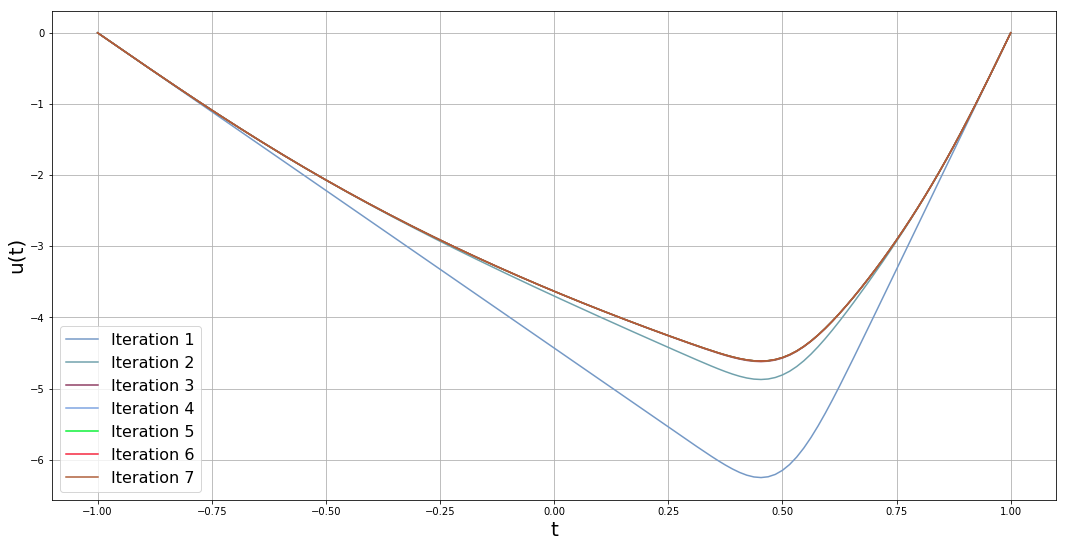

Wall time: 1.95 s


In [181]:
%%time

k0 = 1
k1 = 0.05
N = 128
h = 2/128

u0 = np.zeros(N + 1)
x = [ -1 + h*i for i in range(N+1)]

u = Newton_method(x, u0)